In [20]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from joblib import load
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef,confusion_matrix, ConfusionMatrixDisplay, auc, roc_auc_score, roc_curve, RocCurveDisplay

## Logistic Regression

In [9]:
model = load("../models/logreg.joblib")
test_data = load("../data/test data/logreg_test_data.joblib")

In [10]:
label_predictions = model.predict(test_data["features"])

Classification report

In [33]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52      2855
           1       0.62      0.72      0.67      3448

    accuracy                           0.61      6303
   macro avg       0.60      0.60      0.60      6303
weighted avg       0.61      0.61      0.60      6303



Matthews correlation coeficient

In [34]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20171661759204498

Confusion matrix

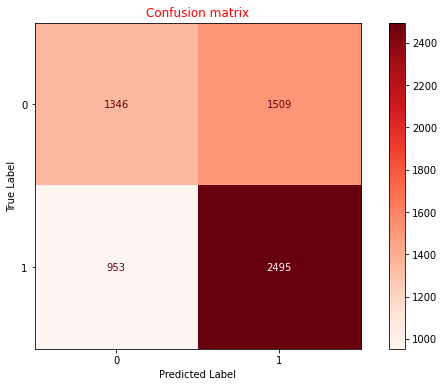

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

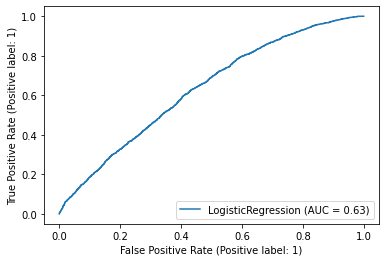

In [13]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Support Vector Machine

In [14]:
model = load("../models/svm.joblib")
test_data = load("../data/test data/svm_test_data.joblib")

In [15]:
label_predictions = model.predict(test_data["features"])

Classification report

In [38]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.63      0.38      0.48      2816
           1       0.62      0.82      0.71      3487

    accuracy                           0.62      6303
   macro avg       0.63      0.60      0.59      6303
weighted avg       0.63      0.62      0.60      6303



Matthews correlation coeficient

In [39]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.22683047833034195

Confusion matrix

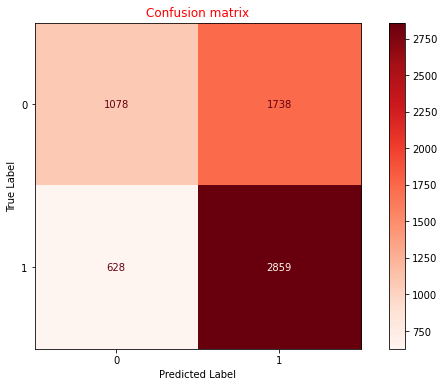

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

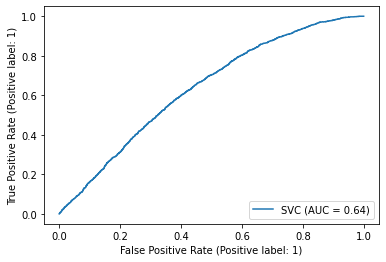

In [16]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Feedforward Neural Network with ReLu Activation

In [17]:
model = keras.models.load_model("../models/NNRelu")
test_data = load("../data/test data/nnrelu_test_data.joblib")

In [19]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 1s 2ms/step


Classification report

In [5]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2835
           1       0.55      1.00      0.71      3468

    accuracy                           0.55      6303
   macro avg       0.28      0.50      0.35      6303
weighted avg       0.30      0.55      0.39      6303



Matthews correlation coeficient

In [6]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

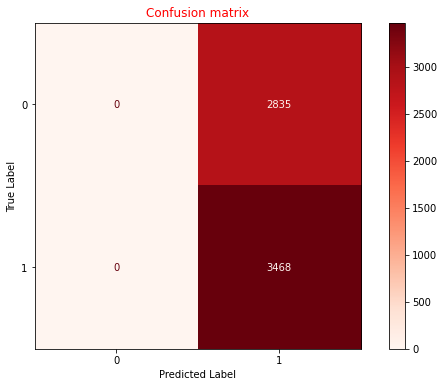

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

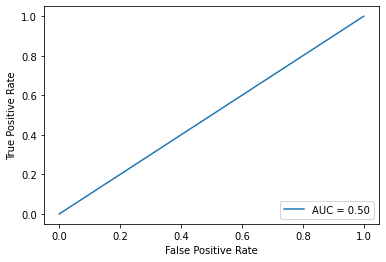

In [32]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Feedforward Neural Network with Sigmoid Activation

In [38]:
model = keras.models.load_model("../models/NNSigmoid")
test_data = load("../data/test data/nnsigmoid_test_data.joblib")

In [39]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 2ms/step


Classification report

In [48]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01      2784
           1       0.56      1.00      0.72      3519

    accuracy                           0.56      6303
   macro avg       0.78      0.50      0.36      6303
weighted avg       0.75      0.56      0.40      6303



Matthews correlation coeficient

In [49]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.051111823024968445

Confusion matrix

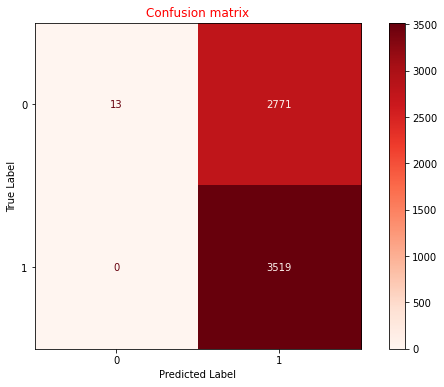

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

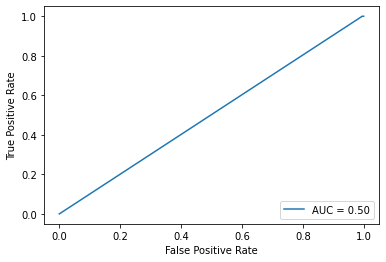

In [40]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## XGBoost

In [41]:
model = load("../models/xgboost.joblib")
test_data = load("../data/test data/xgboost_test_data.joblib")

In [42]:
label_predictions = model.predict(test_data["features"])

Classification report

In [53]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.68      0.29      0.41      2800
           1       0.61      0.89      0.73      3503

    accuracy                           0.63      6303
   macro avg       0.65      0.59      0.57      6303
weighted avg       0.64      0.63      0.59      6303



Matthews correlation coeficient

In [54]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.2324786222758894

Confusion matrix

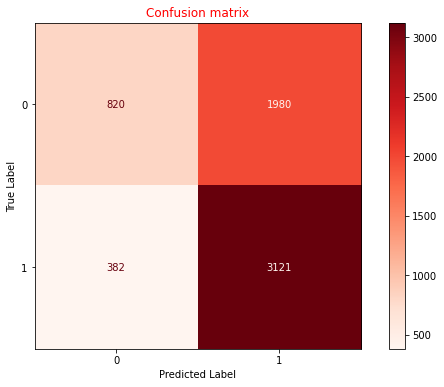

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

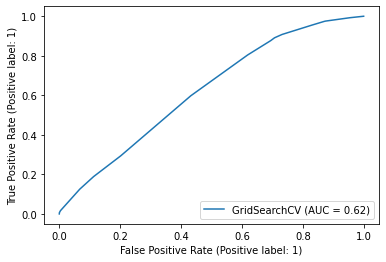

In [43]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);